# Image classification on the MNIST handwritten digits recognition dataset

In [ ]:
# import libraries and MNIST Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import confusion_matrix, classification_report
from keras.utils.vis_utils import plot_model
from keras.utils import np_utils

In [ ]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

11501568/11490434 [==============================] - 0s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


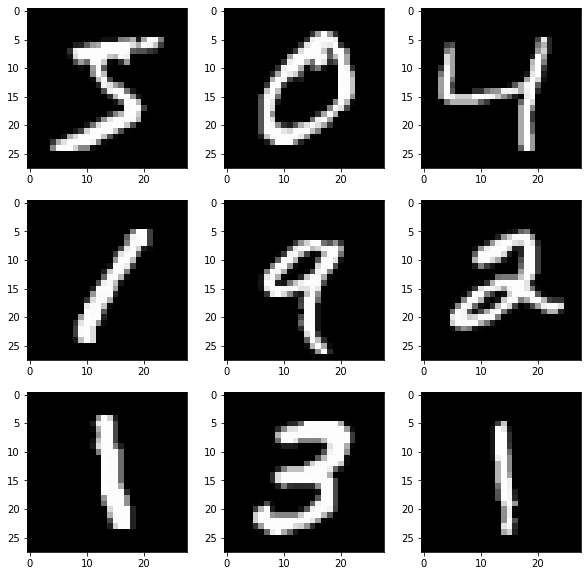

In [ ]:
# plot first few images
fig = plt.figure(figsize = (10,10)) 
for i in range(9):
	plt.subplot(330 + 1 + i) # define subplot
	plt.imshow(X_train[i], cmap=plt.get_cmap('gray')) # plot raw pixel data
plt.show() # show the figure

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


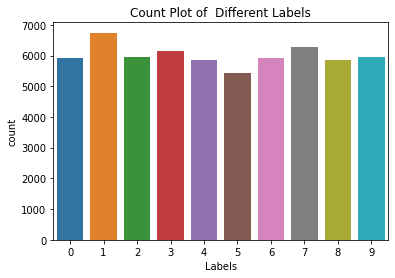

In [ ]:
# Plot the count plot of training labels
sns.countplot(y_train)
plt.xlabel('Labels')
plt.title('Count Plot of  Different Labels')
plt.show()

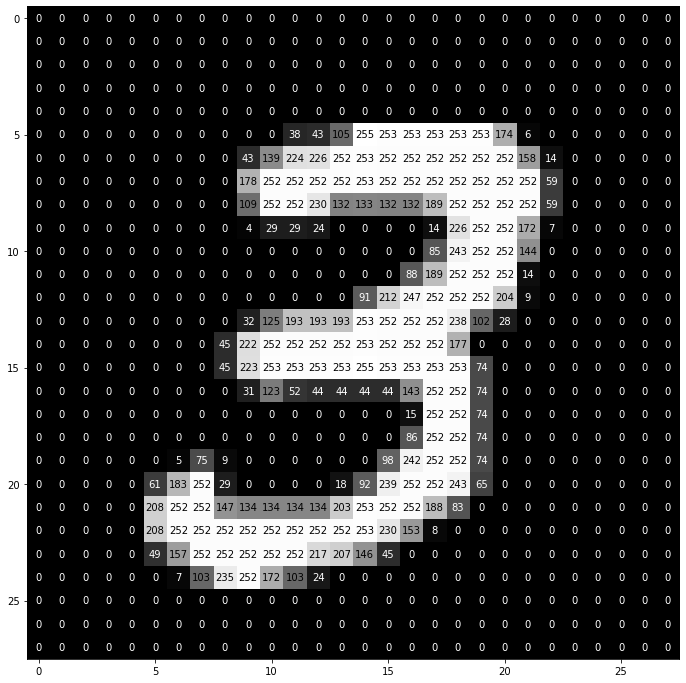

In [ ]:
#Detail visalisation of an digit
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)

# Select a number
number_3 = X_train[7].reshape(28, 28)
visualize_input(number_3, ax)  # pass image (28, 28)

In [ ]:
# reshape image as required by ANN
X_train = X_train.reshape(X_train.shape[0], 28*28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28*28).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# one hot encode target values
y_train_OHC = to_categorical(y_train)
y_test_OHC = to_categorical(y_test)

In [ ]:
print(y_train[0], '------>', y_train_OHC[0])
print(y_test[0], '------>',y_test_OHC[0])

5 ------> [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
7 ------> [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
# define the base model
def ANN_model():
    model = Sequential() # create model
    model.add(Dense(128, kernel_initializer='he_uniform', activation='relu',
                    input_dim = 28*28)) #First Dense Layer
    model.add(Dense(10, kernel_initializer='he_uniform', 
                    activation='softmax')) # OutPut Layer

	# Compile model
    opt = SGD(learning_rate=0.01, momentum=0.9) #Define optimizer parameters
    model.compile(loss='categorical_crossentropy', 
                  optimizer= opt, metrics=['accuracy'])
    return model

# Call ANN_Model function to build the model
model_ANN = ANN_model()
print(model_ANN.summary()) # Print summary of the model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


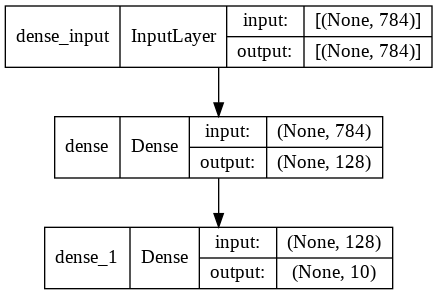

In [ ]:
plot_model(model_ANN, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Fit the model_ANN
history = model_ANN.fit(X_train, y_train_OHC, validation_data=(X_test, y_test_OHC), epochs=15, batch_size=256)

Epoch 1/15
235/235 [==============================] - 3s 9ms/step - loss: 0.6353 - accuracy: 0.8236 - val_loss: 0.3336 - val_accuracy: 0.9074
Epoch 2/15
235/235 [==============================] - 2s 8ms/step - loss: 0.3142 - accuracy: 0.9122 - val_loss: 0.2735 - val_accuracy: 0.9229
Epoch 3/15
235/235 [==============================] - 2s 7ms/step - loss: 0.2664 - accuracy: 0.9255 - val_loss: 0.2413 - val_accuracy: 0.9310
Epoch 4/15
235/235 [==============================] - 2s 8ms/step - loss: 0.2359 - accuracy: 0.9343 - val_loss: 0.2235 - val_accuracy: 0.9373
Epoch 5/15
235/235 [==============================] - 2s 8ms/step - loss: 0.2131 - accuracy: 0.9411 - val_loss: 0.2009 - val_accuracy: 0.9413
Epoch 6/15
235/235 [==============================] - 2s 8ms/step - loss: 0.1948 - accuracy: 0.9456 - val_loss: 0.1869 - val_accuracy: 0.9450
Epoch 7/15
235/235 [==============================] - 2s 7ms/step - loss: 0.1800 - accuracy: 0.9492 - val_loss: 0.1751 - val_accuracy: 0.9493
Epoch 

In [ ]:
# Final evaluation of the model
scores = model_ANN.evaluate(X_test, y_test_OHC, verbose=0)
print("Scores: %.2f%%" % (scores[1]*100))

Scores: 96.41%


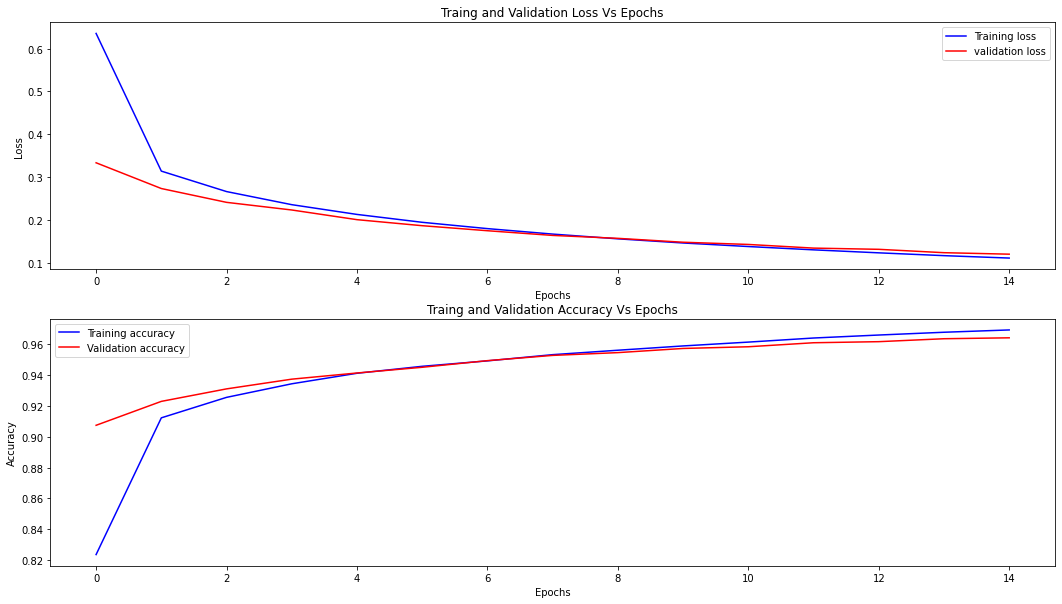

In [ ]:
# Plot the loss and accuracy curves for training and Test Dataset 
def plot_loss_accuracy(history):
    # Loss Plot
    fig, ax = plt.subplots(2,1, figsize=(18, 10))
    ax[0].plot(history.history['loss'], color='b', label="Training loss")
    ax[0].plot(history.history['val_loss'], color='r', label="validation loss")
    legend = ax[0].legend(loc='best')
    ax[0].set_title('Traing and Validation Loss Vs Epochs')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')

    # Accuracy Plot
    ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
    ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
    legend = ax[1].legend(loc='best')
    ax[1].set_title('Traing and Validation Accuracy Vs Epochs')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')


plot_loss_accuracy(history)
plt.show() # Show the plots

313/313 [==============================] - 0s 1ms/step


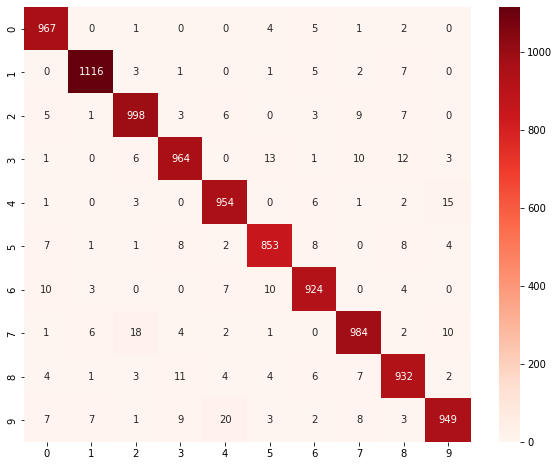

In [ ]:
# make prediction on test dataset
y_pred = np.argmax(model_ANN.predict(X_test, verbose=1), 1)

#plot function for confusion matrix heatmap
def plot_heat_map(y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)
    figure = plt.figure(figsize=(10,8))
    sns.heatmap(conf_matrix, annot = True,  fmt='g', cmap='Reds')

plot_heat_map(y_pred)  
plt.show()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               12900     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 124,490
Trainable params: 124,490
Non-tr

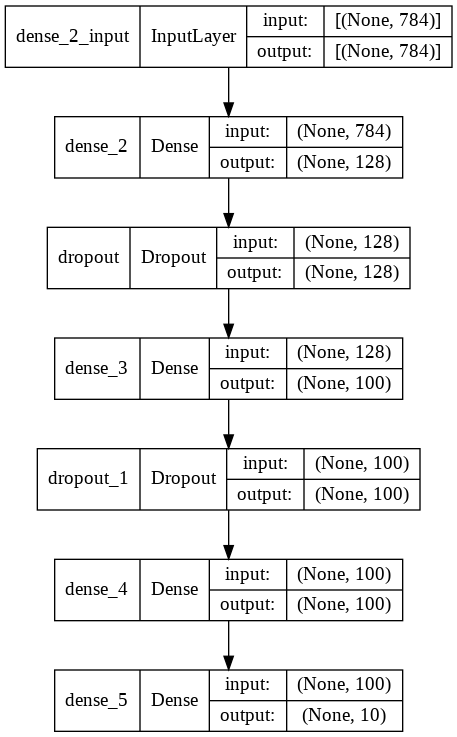

In [ ]:
# Update the ANN model to improve performance
def Updated_ANN_model():
    # create model
    model = Sequential() # create model
    model.add(Dense(128, kernel_initializer='he_uniform', activation='relu', input_dim = 28*28)) #First Dense Layer
    model.add(Dropout(0.25)) #First Dropout Layer
    model.add(Dense(100, kernel_initializer='he_uniform', activation='relu'))  #Second Dense Layer
    model.add(Dropout(0.25)) #Second Dropout Layer
    model.add(Dense(100, kernel_initializer='he_uniform', activation='relu')) #Third Dense Layer
    model.add(Dense(10, activation='softmax')) # OutPut Layer

	# Compile model
    opt = SGD(learning_rate=0.01, momentum=0.9) #Define optimizer parameters
    model.compile(loss='categorical_crossentropy', optimizer= opt, metrics=['accuracy'])
    return model

# Call updated ANN_Model function to build the model
update_model_ANN = Updated_ANN_model()
print(update_model_ANN.summary()) # Print summary of the model
plot_model(update_model_ANN, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Fit the model
history = update_model_ANN.fit(X_train, y_train_OHC, validation_data=(X_test, y_test_OHC), epochs=30, batch_size=256)

Epoch 1/30
235/235 [==============================] - 2s 8ms/step - loss: 0.8325 - accuracy: 0.7359 - val_loss: 0.2835 - val_accuracy: 0.9170
Epoch 2/30
235/235 [==============================] - 2s 7ms/step - loss: 0.3649 - accuracy: 0.8918 - val_loss: 0.2148 - val_accuracy: 0.9365
Epoch 3/30
235/235 [==============================] - 2s 7ms/step - loss: 0.2864 - accuracy: 0.9158 - val_loss: 0.1753 - val_accuracy: 0.9473
Epoch 4/30
235/235 [==============================] - 2s 6ms/step - loss: 0.2425 - accuracy: 0.9273 - val_loss: 0.1506 - val_accuracy: 0.9542
Epoch 5/30
235/235 [==============================] - 2s 6ms/step - loss: 0.2167 - accuracy: 0.9359 - val_loss: 0.1364 - val_accuracy: 0.9589
Epoch 6/30
235/235 [==============================] - 2s 7ms/step - loss: 0.1979 - accuracy: 0.9411 - val_loss: 0.1261 - val_accuracy: 0.9602
Epoch 7/30
235/235 [==============================] - 2s 7ms/step - loss: 0.1764 - accuracy: 0.9471 - val_loss: 0.1176 - val_accuracy: 0.9636
Epoch 

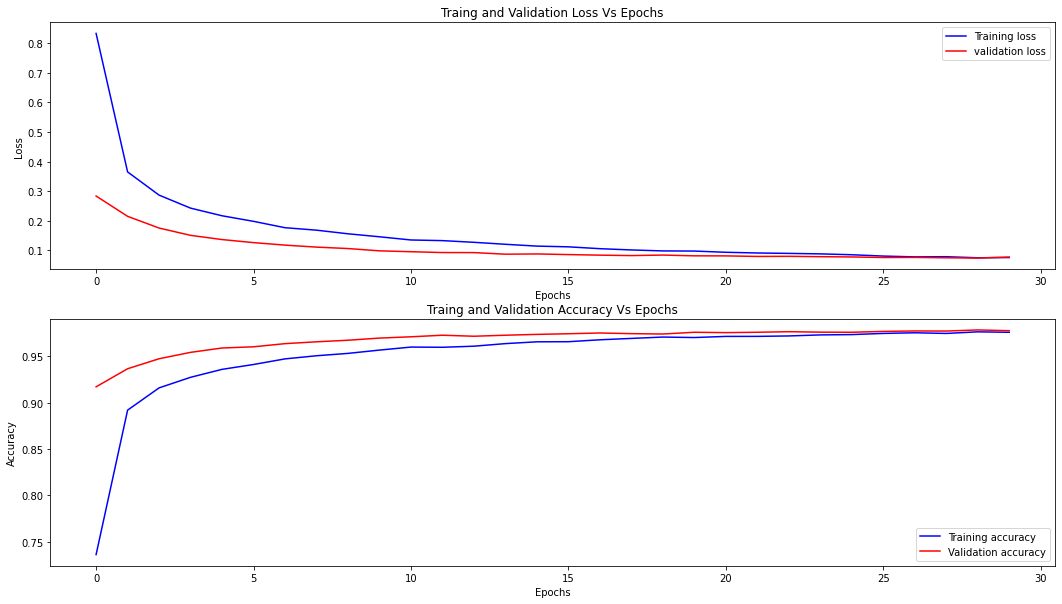

In [ ]:
# Plot the loss and accuracy curves for training and validation 
plot_loss_accuracy(history)
plt.show() # Show the plots

In [ ]:
# Final evaluation of the model
scores = update_model_ANN.evaluate(X_test, y_test_OHC, verbose=0)
print("Scores: %.2f%%" % (scores[1]*100))
print("Error: %.2f%%" % (100-scores[1]*100))

Scores: 97.76%
Error: 2.24%


In [ ]:
def classification_score():
    classification_scores = classification_report(y_test, y_pred)
    print(classification_scores)

classification_score()

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.98      0.98      0.98      1135
           2       0.97      0.97      0.97      1032
           3       0.96      0.95      0.96      1010
           4       0.96      0.97      0.97       982
           5       0.96      0.96      0.96       892
           6       0.96      0.96      0.96       958
           7       0.96      0.96      0.96      1028
           8       0.95      0.96      0.95       974
           9       0.97      0.94      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



313/313 [==============================] - 0s 1ms/step


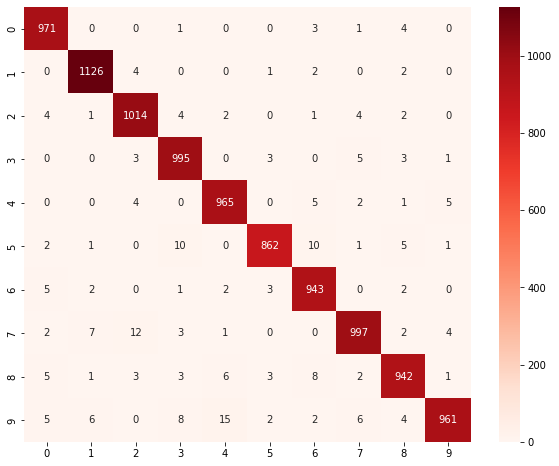

In [ ]:
# make prediction on test dataset with updated model
y_pred = np.argmax(update_model_ANN.predict(X_test, verbose=1), 1)

#plot the heatmap
plot_heat_map(y_pred)  
plt.show()

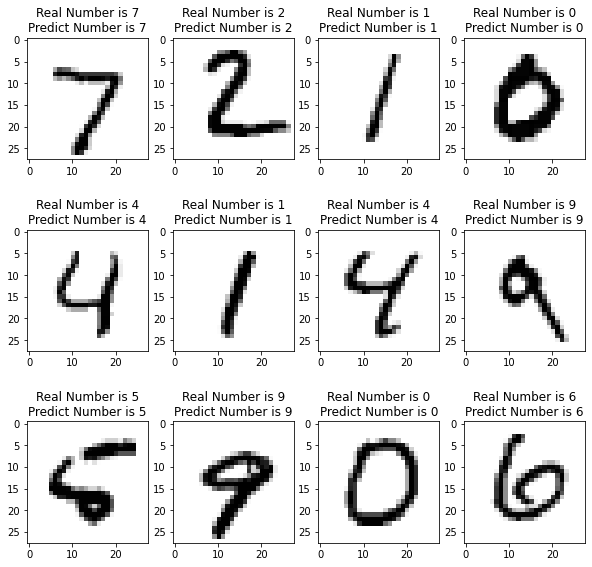

In [ ]:

def plot_ActualVsPredicted_images(X_test, y_pred):
    X_test__ = X_test.reshape(X_test.shape[0], 28, 28)

    fig, axis = plt.subplots(3, 4, figsize=(10, 10))
    for i, ax in enumerate(axis.flat):
        ax.imshow(X_test__[i], cmap='binary')
        ax.set(title = f"Real Number is {y_test[i]}\nPredict Number is {y_pred[i]}");

# Plot actual vs predicted values on test data
plot_ActualVsPredicted_images(X_test, y_pred)

# CNN model 

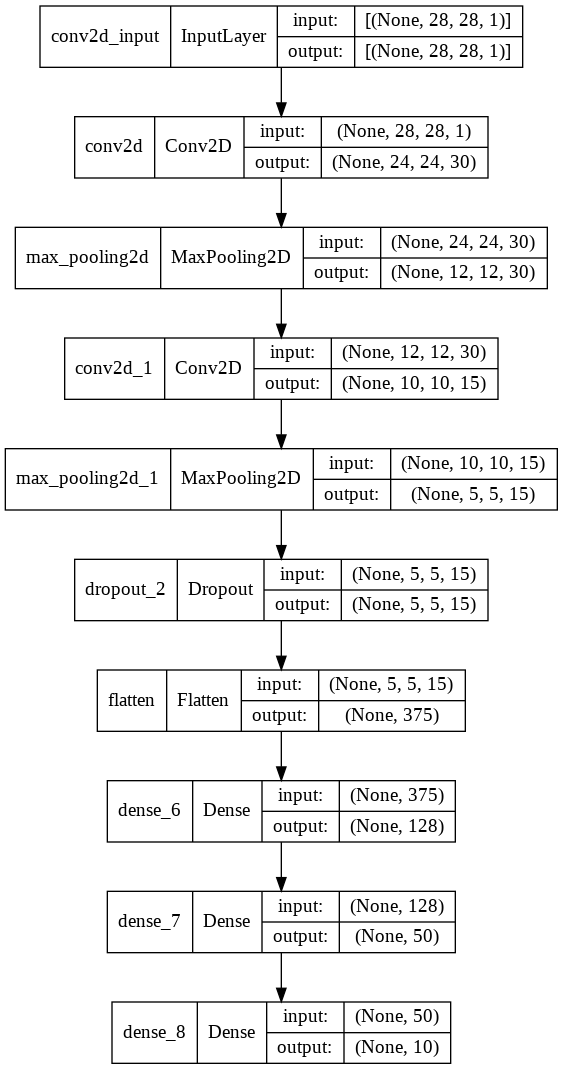

In [ ]:

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0
# one hot encode target values
y_train_OHC = to_categorical(y_train)
y_test_OHC = to_categorical(y_test)
# define the larger model
def CNN_model():
	# create model
	model = Sequential()
	model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu', ))
	model.add(MaxPooling2D())
	model.add(Conv2D(15, (3, 3), activation='relu'))
	model.add(MaxPooling2D())
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(50, activation='relu'))
	model.add(Dense(10, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# build the model
model = CNN_model()
#print(model.summary())
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Fit the model
history = model.fit(X_train, y_train_OHC, validation_data=(X_test, y_test_OHC), epochs=15, batch_size=256)

Epoch 1/15
235/235 [==============================] - 33s 137ms/step - loss: 0.4421 - accuracy: 0.8615 - val_loss: 0.0936 - val_accuracy: 0.9714
Epoch 2/15
235/235 [==============================] - 46s 197ms/step - loss: 0.1028 - accuracy: 0.9679 - val_loss: 0.0471 - val_accuracy: 0.9849
Epoch 3/15
235/235 [==============================] - 32s 137ms/step - loss: 0.0696 - accuracy: 0.9782 - val_loss: 0.0386 - val_accuracy: 0.9879
Epoch 4/15
235/235 [==============================] - 32s 138ms/step - loss: 0.0584 - accuracy: 0.9815 - val_loss: 0.0450 - val_accuracy: 0.9867
Epoch 5/15
235/235 [==============================] - 33s 142ms/step - loss: 0.0489 - accuracy: 0.9844 - val_loss: 0.0280 - val_accuracy: 0.9913
Epoch 6/15
235/235 [==============================] - 32s 137ms/step - loss: 0.0448 - accuracy: 0.9861 - val_loss: 0.0292 - val_accuracy: 0.9903
Epoch 7/15
235/235 [==============================] - 32s 137ms/step - loss: 0.0392 - accuracy: 0.9875 - val_loss: 0.0276 - val_ac

In [ ]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test_OHC, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Large CNN Error: 0.68%


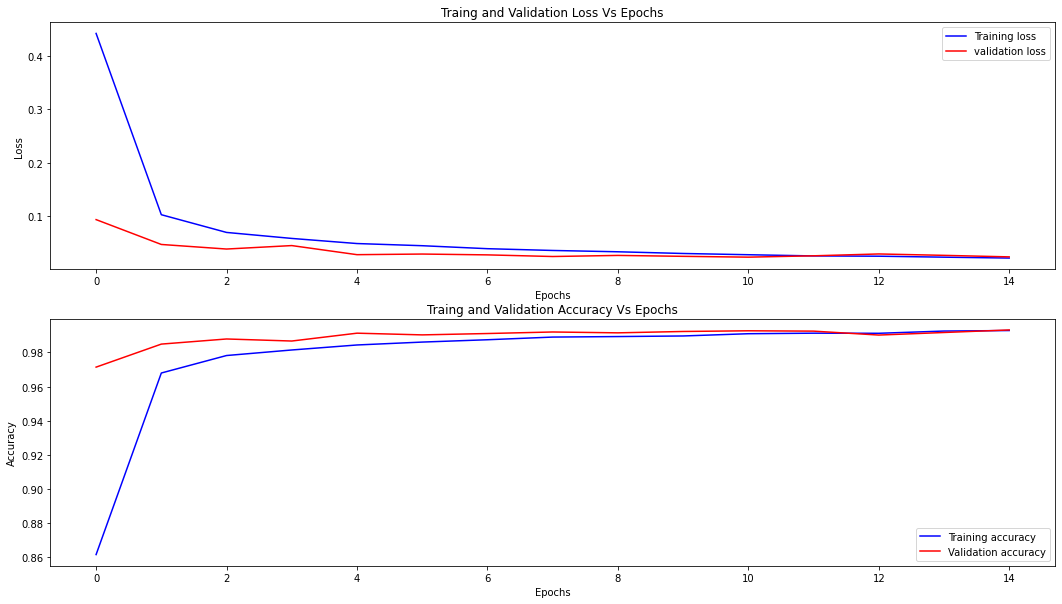

In [ ]:
# Plot the loss and accuracy curves for training and validation 
plot_loss_accuracy(history)
plt.show() # Show the plots

313/313 [==============================] - 2s 6ms/step


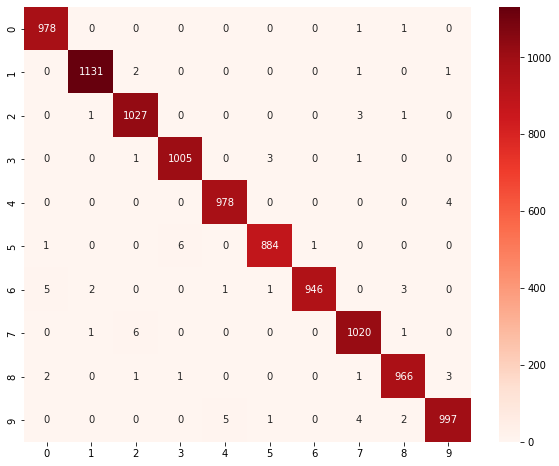

In [ ]:
# make prediction on test dataset with updated model
y_pred = np.argmax(model.predict(X_test, verbose=1), 1)

#plot the heatmap
plot_heat_map(y_pred)  
plt.show()

In [ ]:
classification_score()

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



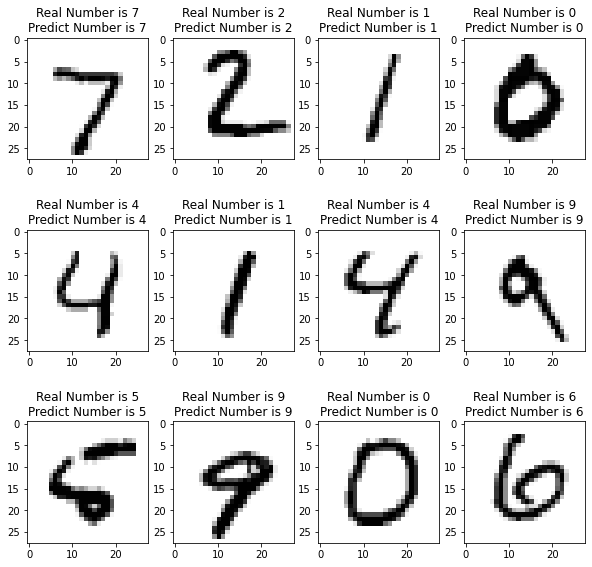

In [ ]:
# Plot actual vs predicted values on test data
plot_ActualVsPredicted_images(X_test, y_pred)